# *Predictive Analysis*: Penjualan Rumah di Kota King, USA

Analisis oleh [Shelly Victory](https://www.dicoding.com/users/victorysl)

*Dataset*: [House Sales in King Country, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

### 1. Pendahuluan
Pada proyek ini dilakukan analisis prediksi harga rumah di Kota King dan Seattle sebagai tugas *submission* pertama pada kelas *Machine Learning* Terapan.

### 2. Mengimpor Pustaka *Python* yang  Diperlukan

In [1]:
# pengolahan data
import numpy as np
import os
import pandas as pd

# visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf

# perancangan model
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

### 3. *Data Loading*

#### 3.1. Mengunduh dan Mendeskripsikan *Dataset*

In [2]:
os.listdir('sample_data')
df = pd.read_csv('sample_data/df.csv')
df

id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]

### 4. *Exploratory Data Analysis*
Pada tahapan ini akan dilakukan investigasi awal pada *dataset* seperti informasi yang dimuat dan mendeteksi beberapa macam anomali. 

#### 4.1 Deskripsi Fitur

In [3]:
# melihat fitur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Sebelum dilakukan penyesuaian, fitur yang terdapat pada *dataset* ini meliputi: <br>
1. id: Id unik penjualan masing-masing rumah
2. date: tanggal terjualnya rumah
3. price: harga rumah
4. bedrooms: jumlah kamar tidur
5. bathrooms: jumlah kamar mandi
6. sqft_living: luas ruang tamu dalam satuan kaki persegi
7. sqft_lot: luas tanah dalam satuan kaki persegi
8. floors: jumlah lantai
9. waterfront: Apakah apartemen menghadap kawasan tepi air
10. view: tingkat kebagusan pemandangan dalam skala 1-4
11. condition: kualitas kondisi rumah dalam skala 1-5
12. grade: kualitas konstruksi dan desain rumah dalam skala 1-13.
13. sqft_above: luas kaki kuadrat rumah di atas permukaan tanah
14. sqft_basement: luas kaki kuadrat rumah di bawah permukaan tanah
15. yr_built: tahun rumah mulai dibangun
16. yr_renovated: tahun terakhir rumah direnovasi
17. zipcode: kode pos
18. lat: garis lintang
19. long: garis bujur
20. sqft_living15: luas kaki kuadrat area perumahan sebanyak 15 tetangga terdekat
21. sqft_lot15: luas kaki kuadrat tanah sebanyak 15 tetangga terdekat


Pada informasi dataset dapat diketahui bahwa fitur *dataset* telah sesuai.

In [4]:
# melihat informasi statistik dataset pada masing-masing fitur
df.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.400881e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.671272e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

#### 4.2. Identifikasi *Missing Values*

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# menghapus kolom yang tidak diperlukan
del df ['id']

In [7]:
# Membagi fitur tanggal menjadi tahun, bulan, dan tanggal

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop("date",axis=1)

df.head(2)

price  bedrooms  bathrooms  sqft_living  ...  sqft_lot15  year  month  day
0  221900.0         3       1.00         1180  ...        5650  2014     10   13
1  538000.0         3       2.25         2570  ...        7639  2014     12    9

[2 rows x 22 columns]

In [8]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

#### 4.3. Menangani *Outliers*

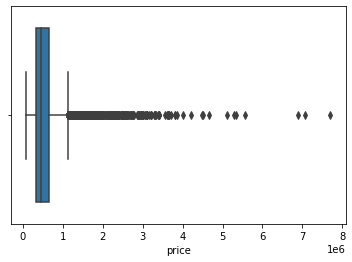

In [9]:
# identfikasi outliers pada kolom harga
sns.boxplot(x = df['price'])

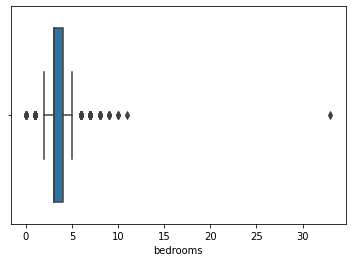

In [10]:
# identfikasi outliers pada kolom bedrooms
sns.boxplot(x = df['bedrooms'])

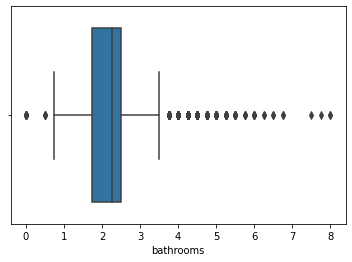

In [11]:
# identfikasi outliers pada kolom bathrooms
sns.boxplot(x = df['bathrooms'])

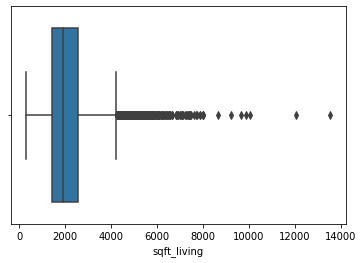

In [12]:
# identfikasi outliers pada kolom sqft_living
sns.boxplot(x = df['sqft_living'])

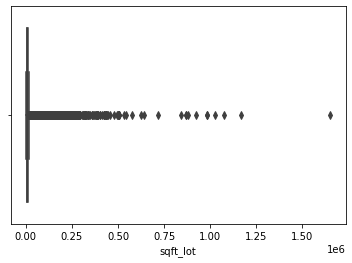

In [13]:
# identfikasi outliers pada kolom sqft_lot
sns.boxplot(x = df['sqft_lot'])

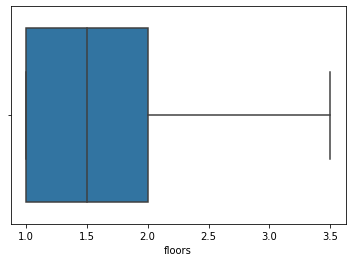

In [14]:
# identfikasi outliers pada kolom floors
sns.boxplot(x = df['floors'])

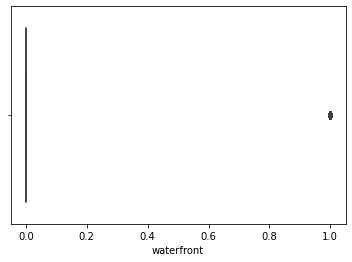

In [15]:
# identfikasi outliers pada kolom waterfront
sns.boxplot(x = df['waterfront'])

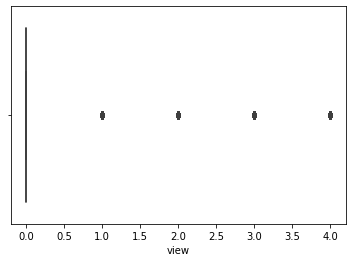

In [16]:
# identfikasi outliers pada kolom view
sns.boxplot(x = df['view'])

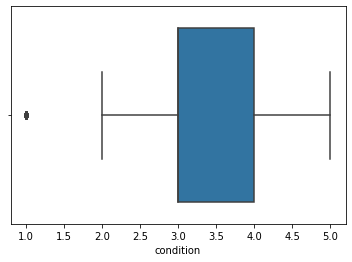

In [17]:
# identfikasi outliers pada kolom condition
sns.boxplot(x = df['condition'])

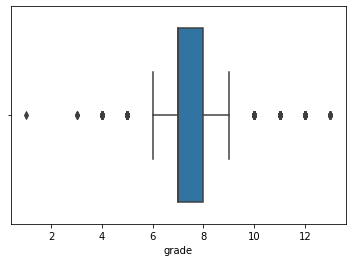

In [18]:
# identfikasi outliers pada kolom grade
sns.boxplot(x = df['grade'])

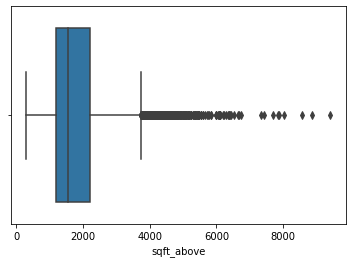

In [19]:
# identfikasi outliers pada kolom sqft_above
sns.boxplot(x = df['sqft_above'])

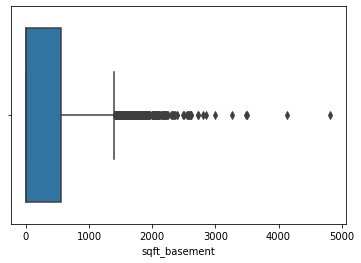

In [20]:
# identfikasi outliers pada kolom sqft_basement
sns.boxplot(x = df['sqft_basement'])

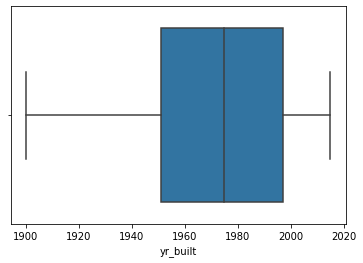

In [21]:
# identfikasi outliers pada kolom yr_built
sns.boxplot(x = df['yr_built'])

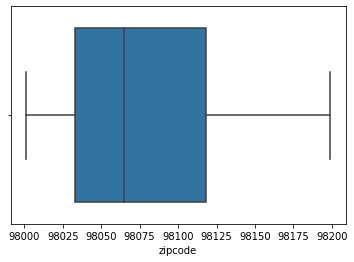

In [22]:
# identfikasi outliers pada kolom zipcode
sns.boxplot(x = df['zipcode'])

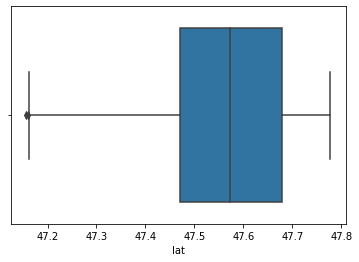

In [23]:
# identfikasi outliers pada kolom lat
sns.boxplot(x = df['lat'])

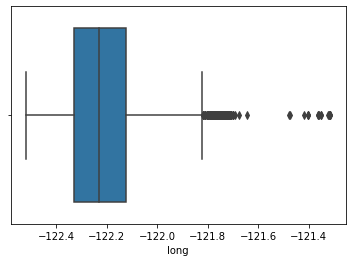

In [24]:
# identfikasi outliers pada kolom long
sns.boxplot(x = df['long'])

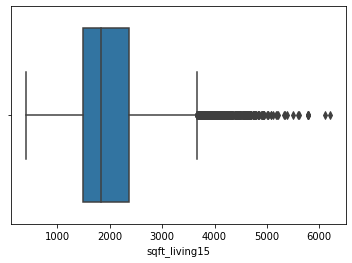

In [25]:
# identfikasi outliers pada kolom sqft_living15
sns.boxplot(x = df['sqft_living15'])

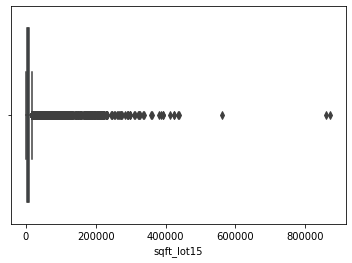

In [26]:
# identfikasi outliers pada kolom sqft_lot15
sns.boxplot(x = df['sqft_lot15'])

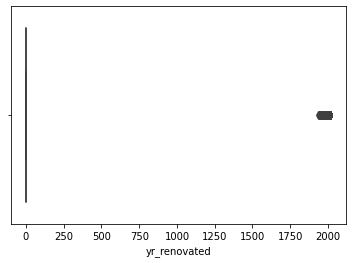

In [27]:
# identfikasi outliers pada kolom yr_renovated
sns.boxplot(x = df['yr_renovated'])

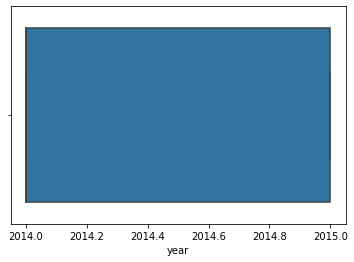

In [28]:
# identfikasi outliers pada kolom year
sns.boxplot(x = df['year'])

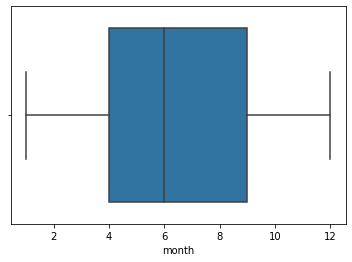

In [29]:
# identfikasi outliers pada kolom month
sns.boxplot(x = df['month'])

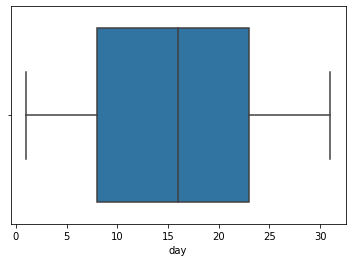

In [30]:
# identfikasi outliers pada kolom day
sns.boxplot(x = df['day'])

In [31]:
# menangani outliers dengan metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

(14934, 22)

#### 4.4. *Univariate Analysis*

In [32]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

In [33]:
# membagi fitur dataset berdasarkan tipe data
# tidak terdapat tipe data kategorikal
numerical_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day']

##### 4.4.1. Analisis pada *Numerical Features*

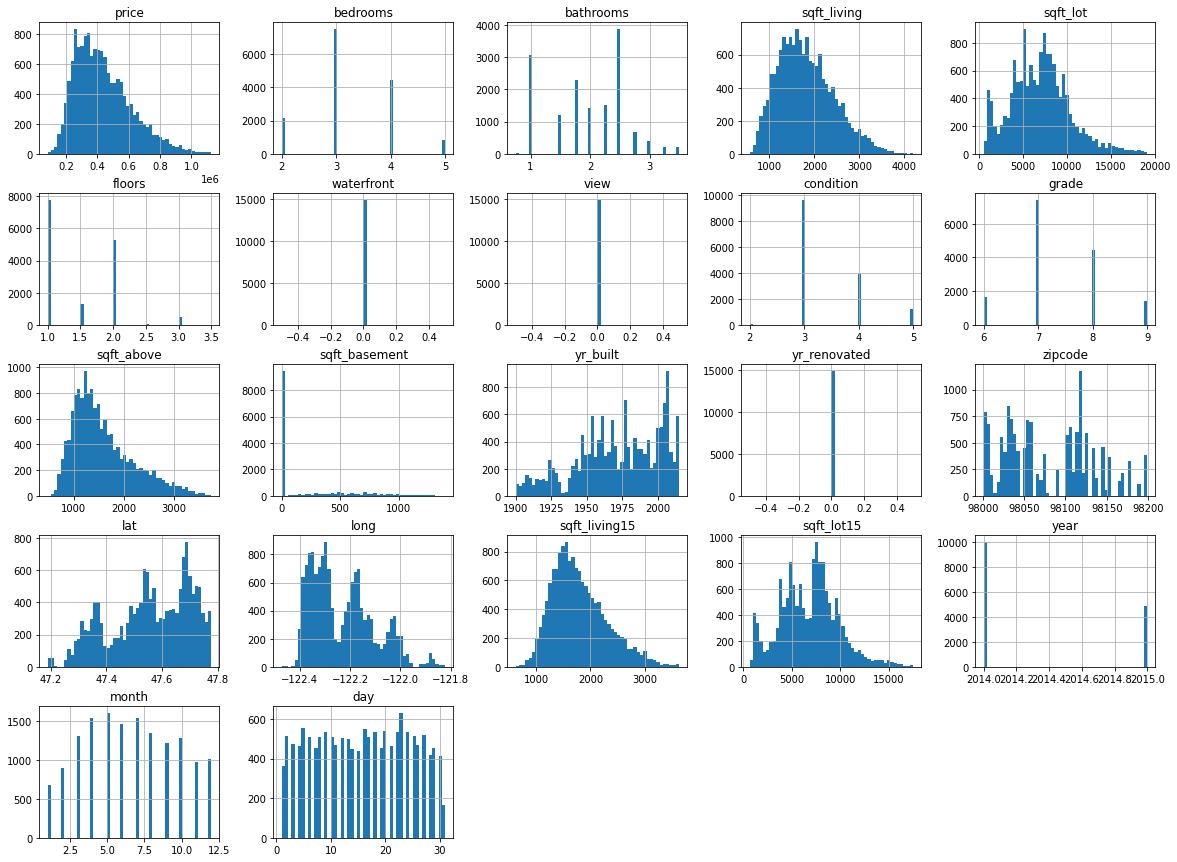

In [34]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

#### 4.5. *Multivariate Analysis*

##### 4.5.1. Analisis Fitur Numerik

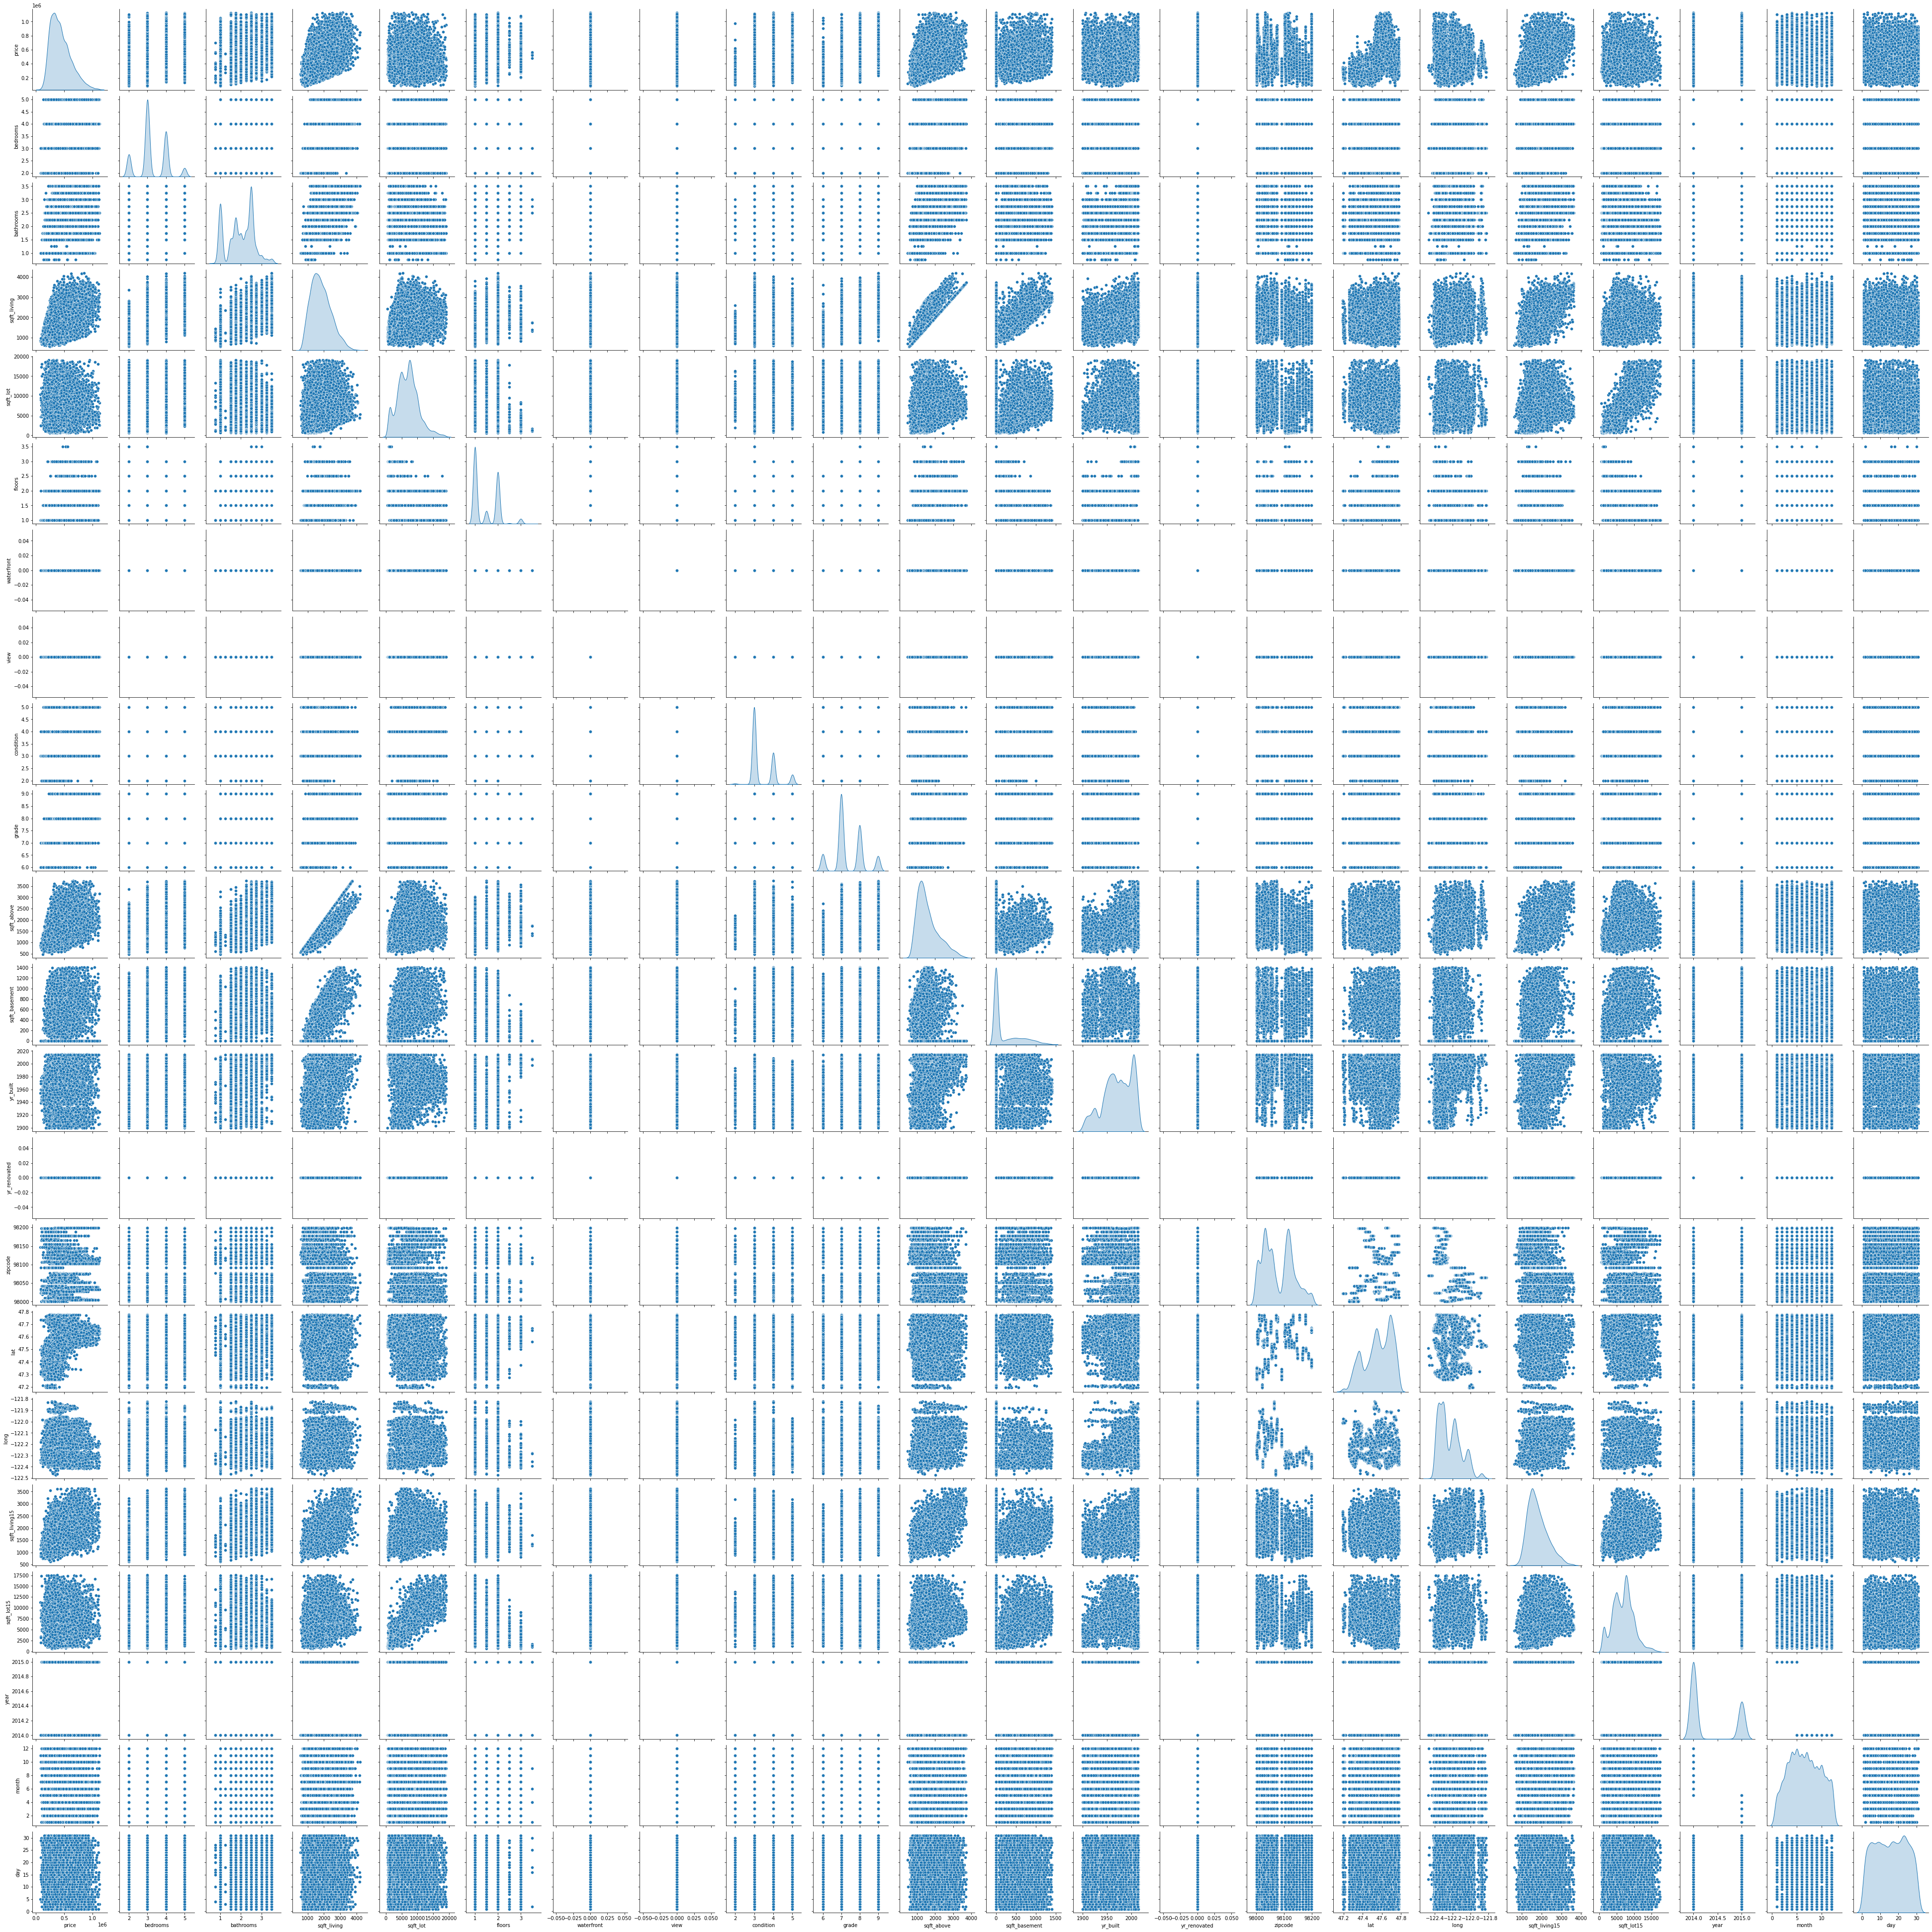

In [35]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

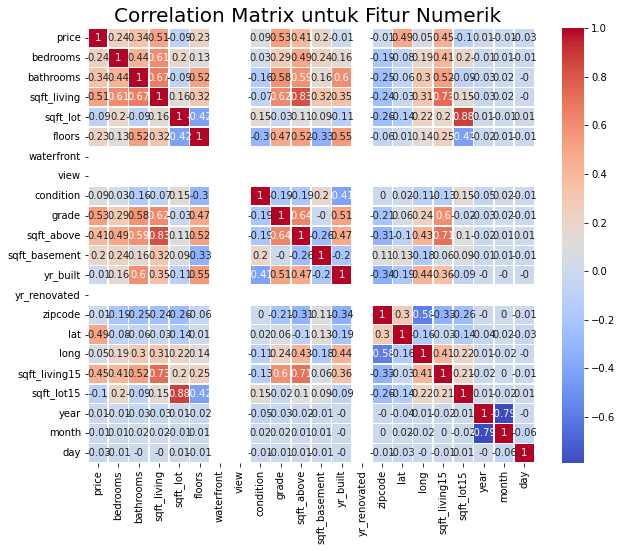

In [36]:
# Evaluasi Skor Korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [37]:
# menghapus kolom yang tidak memiliki korelasi dengan harga
del df ['sqft_lot']
del df ['waterfront']
del df ['view']
del df ['condition']
del df ['yr_built']
del df ['yr_renovated']
del df ['zipcode']
del df ['long']
del df ['year']
del df ['month']
del df ['day']

### 5. Data *Preparation*

#### 5.1. Reduksi dengan PCA

In [38]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

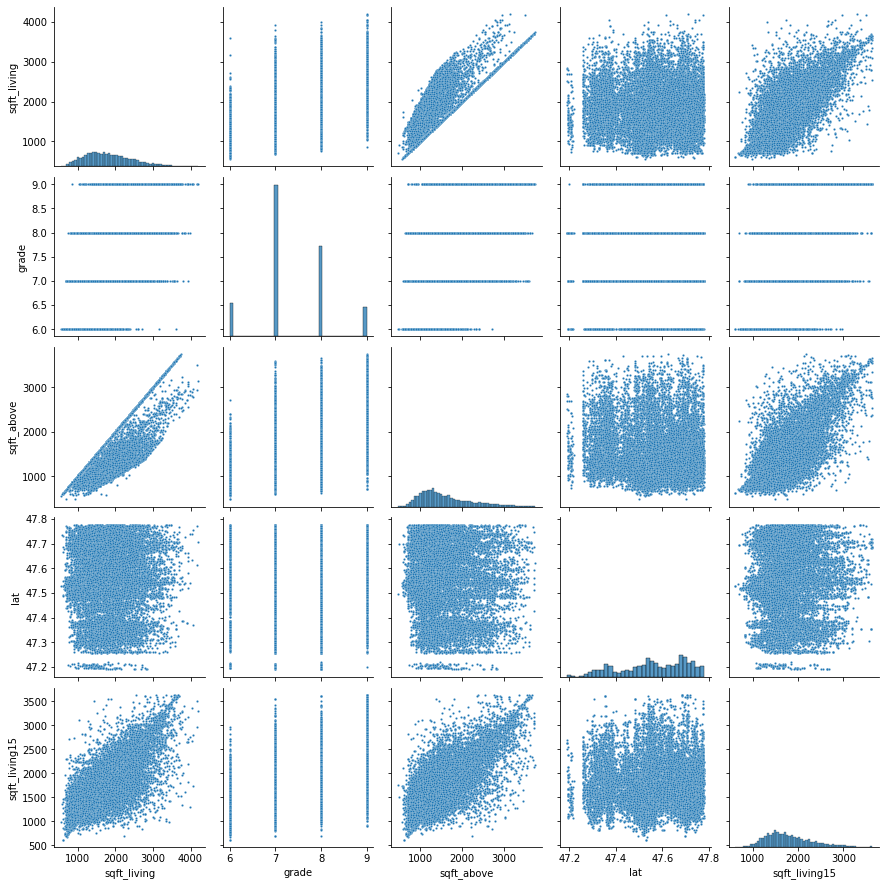

In [39]:
sns.pairplot(df[['sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15']], plot_kws={"s": 5});

In [40]:
pca = PCA(n_components=5, random_state=123)
pca.fit(df[['sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15']])
princ_comp = pca.transform(df[['sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15']])

In [41]:
pca.explained_variance_ratio_.round(5)

array([0.84739, 0.09039, 0.06222, 0.     , 0.     ])

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(df[['sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15']])
df['dimension'] = pca.transform(df.loc[:, ('sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15')]).flatten()
df.drop(['sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15'], axis=1, inplace=True)

#### 5.2. Pembagian *Dataset*

In [43]:
X = df.drop(["price"],axis =1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [44]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 14934
Total # of sample in train dataset: 13440
Total # of sample in test dataset: 1494


#### 5.3. Standarisasi Data

In [45]:
numerical_features = ['dimension', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot15', 'sqft_basement']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


dimension  bedrooms  bathrooms    floors  sqft_lot15  sqft_basement
2999   -0.297744 -0.338017   0.045293 -0.860948   -0.288207       1.049847
7596   -0.321149 -0.338017  -0.341701 -0.860948    0.213841      -0.646157
13659  -1.026145 -0.338017  -0.341701 -0.860948    0.430391      -0.646157
6108   -1.376345 -1.631197  -1.502683 -0.860948   -1.004463      -0.646157
9775    0.741472 -0.338017   1.206276  0.051819   -1.091484       1.869582

In [46]:
X_train[numerical_features].describe().round(4)

dimension    bedrooms  ...  sqft_lot15  sqft_basement
count  13440.0000  13440.0000  ...  13440.0000     13440.0000
mean       0.0000     -0.0000  ...     -0.0000         0.0000
std        1.0000      1.0000  ...      1.0000         1.0000
min       -2.0689     -1.6312  ...     -2.0758        -0.6462
25%       -0.7363     -0.3380  ...     -0.6898        -0.6462
50%       -0.1805     -0.3380  ...      0.0955        -0.6462
75%        0.5736      0.9552  ...      0.5954         0.6258
max        3.7771      2.2483  ...      3.5776         3.3112

[8 rows x 6 columns]

### 6. *Model Development*

#### 6.1. *Model* dengan Algoritma K-Nearest Neighbors

In [47]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [52]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

#### 6.2. *Model* dengan Algoritma Random Forest

In [53]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

#### 6.3. *Model* dengan Boosting Algorithm

In [59]:
boosting = AdaBoostRegressor(n_estimators=75, learning_rate=0.05, random_state=123)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

### 7. Evaluasi Model

In [55]:
## Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [60]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

train         test
KNN        1.5734e+07  1.91459e+07
RF        5.56765e+06   1.8288e+07
Boosting  2.12881e+07  2.14908e+07

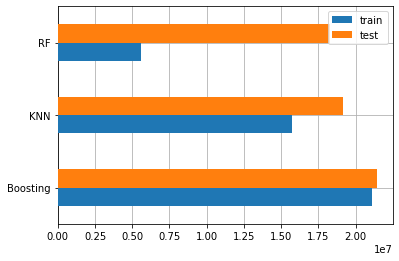

In [57]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [58]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting
10943  472500.0      338937.0     311840.2           500534.4

### 8. Penutupan
Pada proyek ini dilakukan pembuatan model prediksi harga rumah di Kota King, USA. Digunakan 3 jenis alogritma ML yaitu KNN, RF, dan Boosting Algorithm dengan hasil prediksi terbaik oleh model KNN.

### 9. Referensi

Dataset: [House Sales in King Country, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)